In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [3]:
data = pd.read_csv('Air_Quality.csv')
data.head(5)

,Date,Ozone,Solar,Wind,Temp
0,1976-05-01,41.0,190.0,7.4,67
1,1976-05-02,36.0,118.0,8.0,72
2,1976-05-03,12.0,149.0,12.6,74
3,1976-05-04,18.0,313.0,11.5,62
4,1976-05-05,NaN,NaN,14.3,56


In [7]:
data['Date'] = pd.to_datetime(data['Date'])
data.head(5)

,Date,Ozone,Solar,Wind,Temp
0,1976-05-01,41.0,190.0,7.4,67
1,1976-05-02,36.0,118.0,8.0,72
2,1976-05-03,12.0,149.0,12.6,74
3,1976-05-04,18.0,313.0,11.5,62
4,1976-05-05,NaN,NaN,14.3,56


In [9]:
data = data.sort_values('Date')

In [11]:
data.head(5)

,Date,Ozone,Solar,Wind,Temp
0,1976-05-01,41.0,190.0,7.4,67
1,1976-05-02,36.0,118.0,8.0,72
2,1976-05-03,12.0,149.0,12.6,74
3,1976-05-04,18.0,313.0,11.5,62
4,1976-05-05,NaN,NaN,14.3,56


In [13]:
def fill_dates(data):
    data_copy = data.copy()
    data_copy.set_index('Date',inplace=True)
    full_dates = pd.date_range(start=data_copy.index.min(),end=data_copy.index.max(),freq='D')
    data_copy = data_copy.reindex(full_dates)
    return data_copy

In [15]:
data = fill_dates(data)
data.head(5)

,Ozone,Solar,Wind,Temp
1976-05-01,41.0,190.0,7.4,67
1976-05-02,36.0,118.0,8.0,72
1976-05-03,12.0,149.0,12.6,74
1976-05-04,18.0,313.0,11.5,62
1976-05-05,NaN,NaN,14.3,56


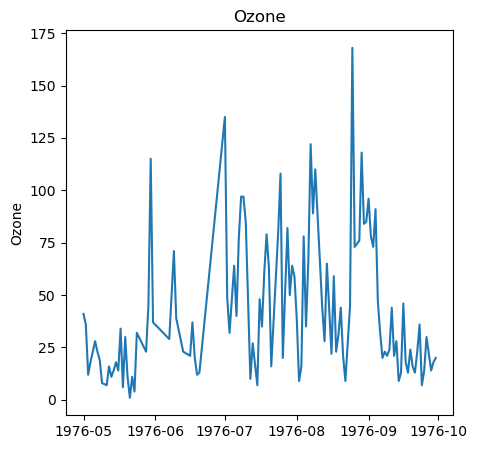

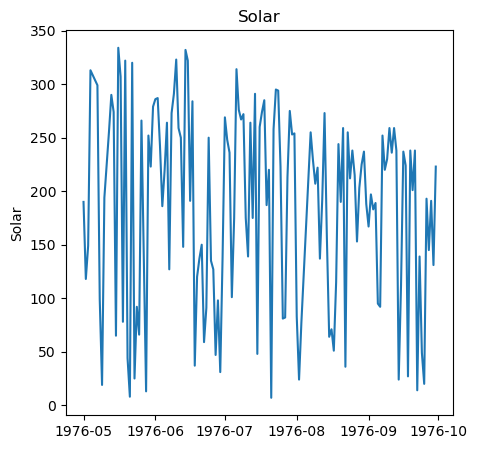

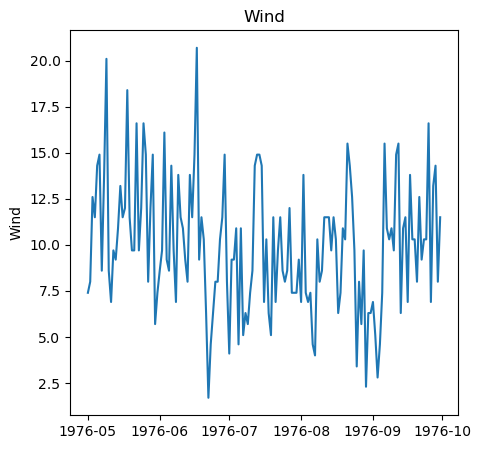

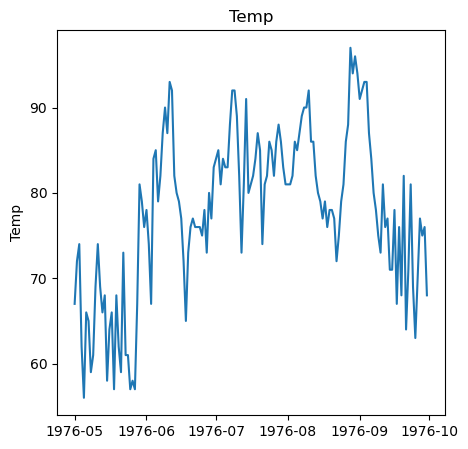

In [21]:
#vizuelizacija
features = ['Ozone','Solar','Wind','Temp']
for feature in features:
    plt.figure(figsize=(5,5))
    sns.lineplot(data[feature])
    plt.title(feature)
    plt.show()

In [23]:
data.isnull().sum()

Ozone    37
Solar     7
Wind      0
Temp      0
dtype: int64

In [25]:
data.tail()

,Ozone,Solar,Wind,Temp
1976-09-26,30.0,193.0,6.9,70
1976-09-27,NaN,145.0,13.2,77
1976-09-28,14.0,191.0,14.3,75
1976-09-29,18.0,131.0,8.0,76
1976-09-30,20.0,223.0,11.5,68


In [27]:
#na sredina se missing values-interpolacija
features_to_interpolate = ['Ozone','Solar']
for feature in features_to_interpolate:
    data[feature] = data[feature].interpolate(method="linear")

In [29]:
data.isnull().sum()

Ozone    0
Solar    0
Wind     0
Temp     0
dtype: int64

<Axes: >

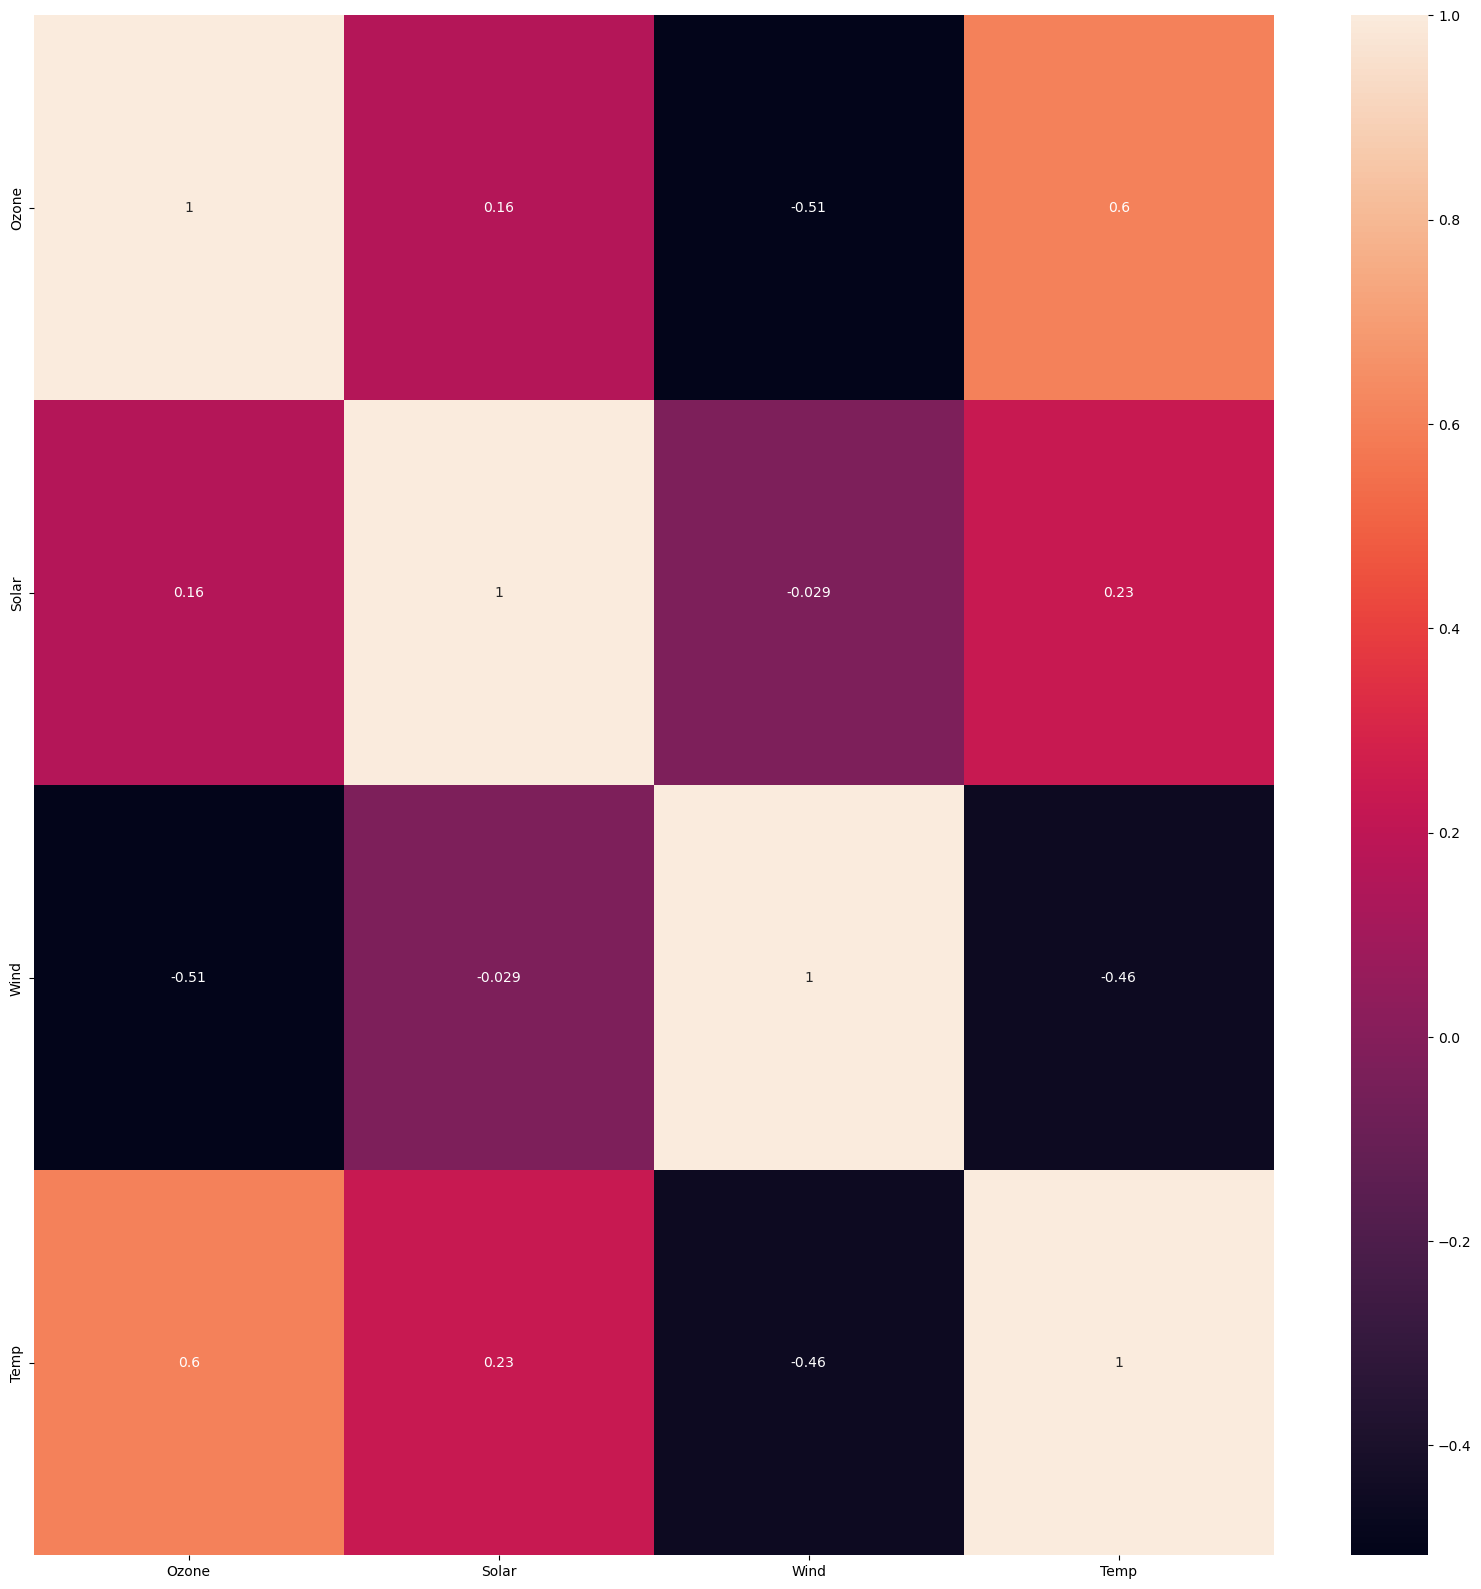

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

In [33]:
#nema da dropneme ntu edna kolona, nikoja ne e vo visoka korelacija so target kolonata 

In [35]:
#kreirame lags za izminatite 3 dena

In [37]:
columns_for_lags = data.columns
for feature in columns_for_lags:
    for lag in range(3,0,-1):
        data[f'{feature}_lag_{lag}'] = data[feature].shift(lag)

In [39]:
data = data.dropna()

In [41]:
data.isnull().sum()

Ozone          0
Solar          0
Wind           0
Temp           0
Ozone_lag_3    0
Ozone_lag_2    0
Ozone_lag_1    0
Solar_lag_3    0
Solar_lag_2    0
Solar_lag_1    0
Wind_lag_3     0
Wind_lag_2     0
Wind_lag_1     0
Temp_lag_3     0
Temp_lag_2     0
Temp_lag_1     0
dtype: int64

In [43]:
data.head(5)

,Ozone,Solar,Wind,Temp,Ozone_lag_3,Ozone_lag_2,Ozone_lag_1,Solar_lag_3,Solar_lag_2,Solar_lag_1,Wind_lag_3,Wind_lag_2,Wind_lag_1,Temp_lag_3,Temp_lag_2,Temp_lag_1
1976-05-04,18.0,313.000000,11.5,62,41.0,36.0,12.0,190.000000,118.000000,149.000000,7.4,8.0,12.6,67.0,72.0,74.0
1976-05-05,23.0,308.333333,14.3,56,36.0,12.0,18.0,118.000000,149.000000,313.000000,8.0,12.6,11.5,72.0,74.0,62.0
1976-05-06,28.0,303.666667,14.9,66,12.0,18.0,23.0,149.000000,313.000000,308.333333,12.6,11.5,14.3,74.0,62.0,56.0
1976-05-07,23.0,299.000000,8.6,65,18.0,23.0,28.0,313.000000,308.333333,303.666667,11.5,14.3,14.9,62.0,56.0,66.0
1976-05-08,19.0,99.000000,13.8,59,23.0,28.0,23.0,308.333333,303.666667,299.000000,14.3,14.9,8.6,56.0,66.0,65.0


In [45]:
#split the dataset in ratio 80:20

In [47]:
from sklearn.model_selection import train_test_split
data_new=data.drop('Temp',axis=1)
X_train,X_test,Y_train,Y_test = train_test_split(data_new,data['Temp'],test_size=0.2,shuffle=False)

In [49]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense

In [51]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
Y_train = scaler.fit_transform(Y_train.to_numpy().reshape(-1, 1))

In [53]:
X_train = X_train.reshape(X_train.shape[0], lag, (X_train.shape[1] // lag))
X_test = X_test.reshape(X_test.shape[0], lag, (X_test.shape[1] // lag))

In [55]:
X_train.shape[2]

15

In [57]:
model = Sequential([
    Input((X_train.shape[1], X_train.shape[2],)),
    LSTM(16, activation="relu", return_sequences=True),
    LSTM(32, activation="relu"),
    Dense(1, activation="linear")
])

In [59]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 16)          │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,353 (32.63 KB)

 Trainable params: 8,353 (32.63 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"],
)

In [63]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=8, batch_size=16, shuffle=False)

Epoch 1/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - loss: 0.2150 - mean_squared_error: 0.2150 - val_loss: 0.4797 - val_mean_squared_error: 0.4797
Epoch 2/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2036 - mean_squared_error: 0.2036 - val_loss: 0.4614 - val_mean_squared_error: 0.4614
Epoch 3/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1936 - mean_squared_error: 0.1936 - val_loss: 0.4450 - val_mean_squared_error: 0.4450
Epoch 4/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1840 - mean_squared_error: 0.1840 - val_loss: 0.4282 - val_mean_squared_error: 0.4282
Epoch 5/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1741 - mean_squared_error: 0.1741 - val_loss: 0.4096 - val_mean_squared_error: 0.4096
Epoch 6/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1630 - mean_squared_error: 0.1630 - val_loss: 0.3879 - val_mean_squared_error: 0.3879
Epoch 7/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1507 - mean_squared_error: 0.1507 - val_loss: 0.3627 - val_mean_squared_error

<Axes: >

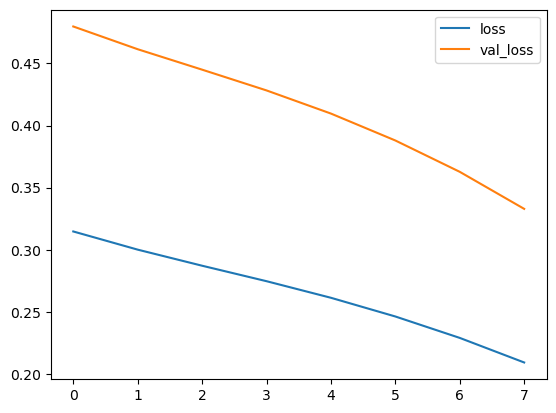

In [65]:
sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

In [67]:
pred_y = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


In [69]:
pred_y = scaler.inverse_transform(pred_y)

In [71]:
from sklearn.metrics import r2_score
r2_score(Y_test, pred_y)

-3.625825881958008